# Customizing Plots

`geoplot` plots have a large number of styling parameters, both cosmetic (for example, the colors of the map borders) and informative (for example, the choice of colormap). This section of the tutorial explains how these work.

You may follow along with this tutorial interactively using [Binder](https://mybinder.org/v2/gh/ResidentMario/geoplot/master?filepath=notebooks/tutorials/Customizing_Plots.ipynb).

## Position

A [**visual variable**](https://wiki.gis.com/wiki/index.php/Visual_variable) is an attribute of a plot that is used to convey information. One such variable that every map has in common is **position**.

In [1]:
%matplotlib inline
import geopandas as gpd
import geoplot as gplt

continental_usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
continental_usa_cities = continental_usa_cities.query('STATE not in ["AK", "HI", "PR"]')
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

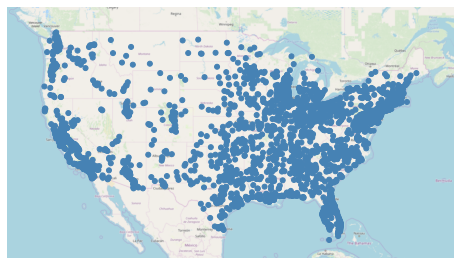

In [2]:
import geoplot.crs as gcrs

ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(continental_usa_cities, ax=ax)

This plot shows cities in the continental United States with greater than 10,000 population. It has only one visual variable, position. By examining the distribution of the points, we see that the part of the United States around the Rocky Mountains is more sparely populated than the coasts.

## Hue

The "hue" parameter in `geoplot` adds **color** as a visual variable in your plot.

> This parameter is called "hue", not "color", because `color` is a reserved keyword in the `matplotlib` API.

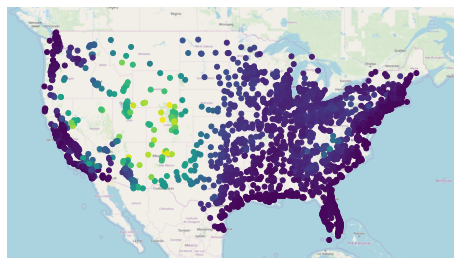

In [3]:
ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(
    continental_usa_cities,
    hue='ELEV_IN_FT',
    ax=ax
)

In this case we set `hue='ELEV_IN_FT'`, telling `geoplot` to color the points based on mean elevation.

There are two ways of assigning colors to geometries: a continuous colormap, which just applies colors on a spectrum of data; or a categorical colormap, which buckets data and applies colors not to those buckets.

`geoplot` uses a continuous colormap by default. To switch to a categorical colormap, use the `scheme` parameter:

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


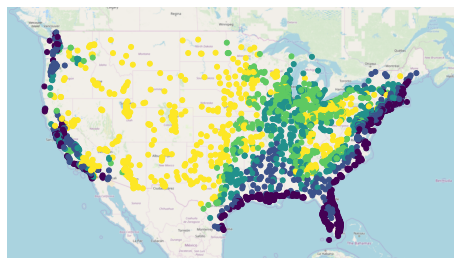

In [4]:
import mapclassify as mc
scheme = mc.Quantiles(continental_usa_cities['ELEV_IN_FT'], k=5)

ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(
    continental_usa_cities,
    hue='ELEV_IN_FT', scheme=scheme,
    ax=ax
)

The [mapclassify](https://pysal.org/mapclassify/) library has a rich list of categorical colormaps to choose from. it is also possible to specify your own custom classification scheme. Refer to the [California districts demo](../gallery/plot_california_districts.rst) in the Gallery for more information.

`geoplot` uses the `viridis` colormap by default. To specify an alternative colormap, use the `cmap` parameter:

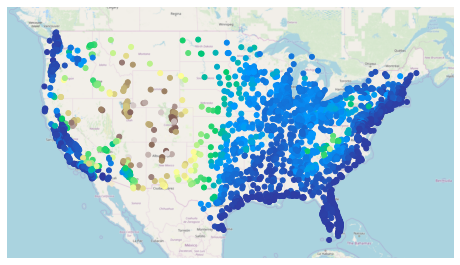

In [5]:
ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(
    continental_usa_cities,
    hue='ELEV_IN_FT', cmap='terrain',
    ax=ax
)

There are [over fifty named colormaps](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) in `matplotlib`&mdash;[the reference page has the full list](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html). It is also possible to create your own colormap. Refer to the [Napoleon's march on Moscow](../gallery/plot_minard_napoleon_russia.rst) example in the Gallery for an example.

**Power User Feature: Colormap Normalization**

[Colormap normalization](https://matplotlib.org/users/colormapnorms.html) is supported in `geoplot` via the `norm` parameter.

## Scale

Another visual variable present in some plots in `geoplot` is **scale**.

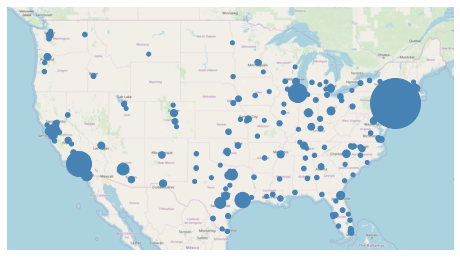

In [29]:
large_continental_usa_cities = continental_usa_cities.query('POP_2010 > 100000')

ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(
    large_continental_usa_cities, projection=gcrs.AlbersEqualArea(),
    scale='POP_2010', limits=(4, 50),
    ax=ax
)

Scale uses the size of the feature to communication information about its magnitude. For example in this plot we can see more easily than in the `hue`-based plots how much larger certain cities (like New York City and Los Angeles) are  than others.

You can adjust the minimum and maximum size of the of the plot elements to your liking using the `limits` parameter.

**Power User Feature: Custom Scaling Functions**

> `geoplot` uses a linear scale by default. To use a different scale, like e.g. logarithmic, pass a scaling function to the `scale_func` parameter. Refer to the [USA city elevations](../gallery/plot_usa_city_elevations.rst) demo in the Gallery for an example.

## Legend

A [**legend**](http://wiki.gis.com/wiki/index.php/Map_legend) provides a reference on the values that correspond to the visual variables in your plot. Legends are an important feature because they make your map interpretable. Without a legend, you can only map visual variables to relative magnitudes. With a legend, you can further map them to actual ranges of values.

To add a legend to your plot, set `legend=True`.

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


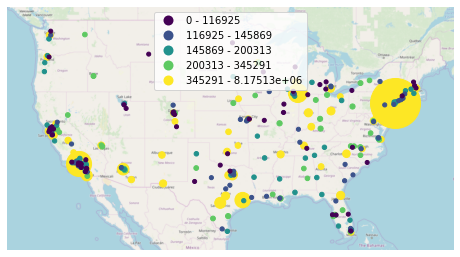

In [28]:
import mapclassify as mc
scheme = mc.Quantiles(large_continental_usa_cities['POP_2010'], k=5)

ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(
    large_continental_usa_cities, projection=gcrs.AlbersEqualArea(),
    scale='POP_2010', limits=(4, 50),
    hue='POP_2010', cmap='viridis', scheme=scheme,
    legend=True, legend_var='hue',
    ax=ax
)

The type of legend you will get depends on your configuration options. There are three different kinds. This example demonstrates a **categorical colormap legend**. If your colormap is continuous (e.g. `scheme=None`; see [the section on Hue](#Hue)), a **continuous colorbar** will be used instead:

/Users/alex/Desktop/geoplot/geoplot/geoplot.py:258: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  f'Please specify "legend_var" explicitly when both "hue" and "scale" are '


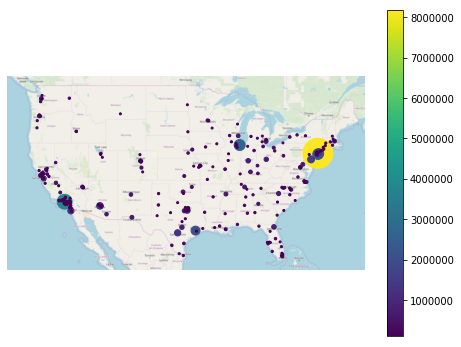

In [32]:
ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(
    large_continental_usa_cities, projection=gcrs.AlbersEqualArea(),
    scale='POP_2010', limits=(2, 30),
    hue='POP_2010', cmap='viridis',
    legend=True,
    ax=ax
)

Alternatively, set `legend_var='scale'` to use a **scale legend** instead:

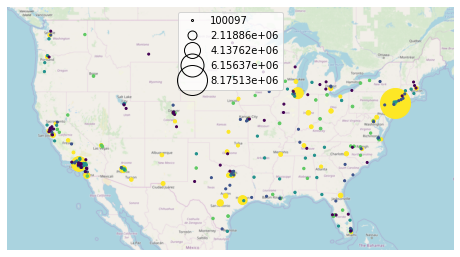

In [33]:
ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(
    large_continental_usa_cities, projection=gcrs.AlbersEqualArea(),
    scale='POP_2010', limits=(2, 30),
    hue='POP_2010', cmap='viridis', scheme=scheme,
    legend=True, legend_var='scale',
    ax=ax
)

You can fine-tune the appearance of the legend using `legend_kwargs` parameter. **The list of values this parameter accepts depends on the legend type**. In the case of a categorical colormap legend or a scale legend, a `matplotlib` `Legend` is used, whose keyword options are listed in [the matplotlib documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.legend.html). In the case of a colorbar legend, the keyword parameters allowed are listed in a different page in [the matplotlib documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.colorbar.html).

Here is an example using `legend_kwargs` parameters to reposition the legend:

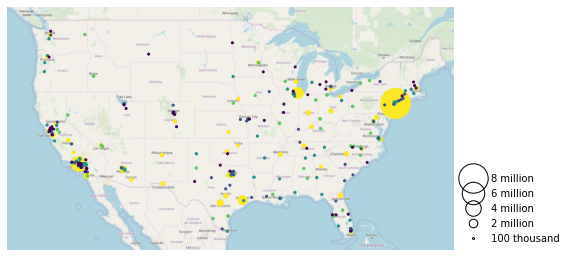

In [40]:
ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(
    large_continental_usa_cities, projection=gcrs.AlbersEqualArea(),
    scale='POP_2010', limits=(2, 30),
    hue='POP_2010', cmap='viridis', scheme=scheme,
    legend=True, legend_var='scale',
    legend_kwargs={'bbox_to_anchor': (1, 0.35), 'frameon': False},
    legend_values=[8000000, 6000000, 4000000, 2000000, 100000],
    legend_labels=['8 million', '6 million', '4 million', '2 million', '100 thousand'],
    ax=ax
)

This example also demonstrates the use of the `legend_values` and `legend_labels` parameters to customize the markers and labels in the legend, respectively.

**Power User Feature: Custom Legend Markers**

> Keyword arguments to `legend_kwargs` that start with `marker` (e.g. `marker`, `markeredgecolor`, `markeredgewidth`, `markerfacecolor`, and `markersize`) [will be passed through the legend down to the legend markers](https://github.com/ResidentMario/geoplot/issues/35#issuecomment-507196579).

## Extent

The **extent** of a plot is the span of its axes. In `geoplot` it is formatted as a tuple of `(min_longitude, min_latitude, max_longitude, max_latitude)`. For example, a plot covering the entire world would have a span of `(-180, -180, 180, 180)`.

The `extent` argument can be used to set the extent of a plot manually. This can be used to change the focus of a map. For example, here's a map of just populous cities in the state of California.

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


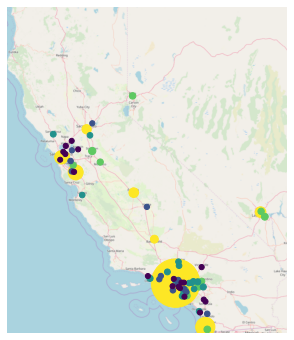

In [46]:
import mapclassify as mc
scheme = mc.Quantiles(large_continental_usa_cities['POP_2010'], k=5)

extent = contiguous_usa.query('state == "California"').total_bounds
ax = gplt.pointplot(
    large_continental_usa_cities, projection=gcrs.WebMercator(),
    scale='POP_2010', limits=(5, 100),
    hue='POP_2010', scheme=scheme, cmap='viridis'
)
gplt.webmap(
    contiguous_usa, ax=ax, extent=extent
)

The [total_bounds](http://geopandas.org/reference.html#geopandas.GeoSeries.total_bounds) property on a `GeoDataFrame`, which returns the extent bounding box values for a given chunk of data, is extremely useful for this purpose.

## Cosmetic parameters

Keyword arugments that are not interpreted as arguments to `geoplot` are instead passed directly to the underlying `matplotlib` chart instance. This means that all of the usual `matplotlib` plot customization options are there.

We won't go over every single possible option here, but we will mention the most common parameters you will want to tweak:

* `edgecolor`&mdash;Controls the color of the border lines.
* `linewidth`&mdash;Controls the width of the border lines.
* `facecolor`&mdash;Controls the color of the fill of the shape.

By combining all of the things we've learned thus far in this guide with a few `matplotlib` customizations we can generate some very pretty-looking plots:

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Cities in the contiguous United States, 2010')

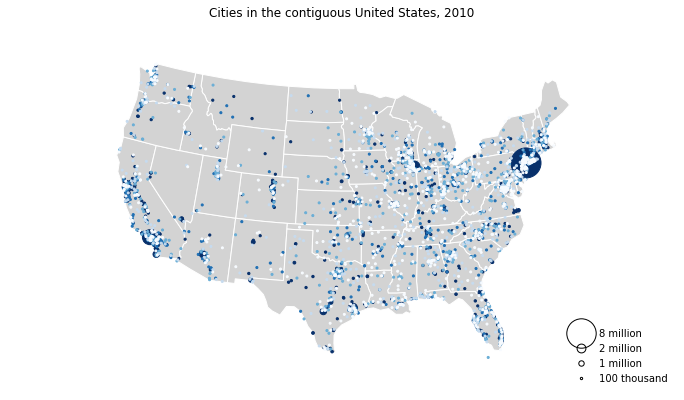

In [47]:
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import mapclassify as mc

scheme = mc.Quantiles(continental_usa_cities['POP_2010'], k=5)
proj = gcrs.AlbersEqualArea()

ax = gplt.polyplot(
    contiguous_usa, 
    zorder=-1,
    linewidth=1,
    projection=proj,
    edgecolor='white',
    facecolor='lightgray',
    figsize=(12, 12)
)

gplt.pointplot(
    continental_usa_cities, 
    scale='POP_2010',
    limits=(2, 30),
    hue='POP_2010',
    cmap='Blues',
    scheme=scheme,
    legend=True,
    legend_var='scale',
    legend_values=[8000000, 2000000, 1000000, 100000],
    legend_labels=['8 million', '2 million', '1 million', '100 thousand'],
    legend_kwargs={'frameon': False, 'loc': 'lower right'},
    ax=ax
)

plt.title("Cities in the contiguous United States, 2010")